# Log Parser Notebook
Exploratory notebook for testing out parsing the logs for workflow statistics


In [1]:
import logging
import datetime
import time

# TODO: better logs: https://www.toptal.com/python/in-depth-python-logging
def configure_logging(save_path='', log_filename='logfile', log_level=logging.INFO):
    """Log to the terminal and to file simultaneously."""
    timestamp = datetime.datetime.fromtimestamp(time.time()).strftime(
        '%Y%m%d.%H%M%S')  # datetime.now().strftime("_%Y-%m-%d_%H-%M-%S")
    logging.basicConfig(
        format="%(asctime)s — %(name)s — %(levelname)s — %(funcName)s:%(lineno)d — %(message)s", #"%(asctime)s %(levelname)s %(message)s",
        level=log_level,
        # Multiple handlers can be added to your logging configuration.
        # By default log messages are appended to the file if it exists already
        handlers=[
            logging.FileHandler(save_path+'/'+log_filename+timestamp+'.log'),
            logging.StreamHandler(),
        ])
    return save_path+'/'+log_filename+timestamp+'.log'


import os
log_path = configure_logging(os.path.join(os.path.dirname(os.getcwd()), "log/run/123456.789"))

### Fake Log Generator

In [2]:
import random
# generate random log messages
supported_feature_types = ["image_centre", "lamella_centre", "needle_tip", "lamella_edge", "landing_post"]
for i in range(100):


    RANDOM_NUM = random.randint(0, 5)

    if RANDOM_NUM > 4:
        feature_type = random.choice(supported_feature_types)
        response = random.choice([True, False])
        logging.info(f"ml_detection: {feature_type}: {response}")
    elif RANDOM_NUM > 3:
        diff = random.randint(-120, 120)
        gam = random.random() * 2.0
        logging.info(f"gamma_correction: diff: {diff:.3f}: gam: {gam:.3f} ")
    
    else:
        logging.info(f"random other log message not with the same structure {random.random():.2f}")


2021-10-26 18:11:28,549 — root — INFO — <module>:19 — random other log message not with the same structure 0.63
2021-10-26 18:11:28,551 — root — INFO — <module>:19 — random other log message not with the same structure 0.95
2021-10-26 18:11:28,552 — root — INFO — <module>:19 — random other log message not with the same structure 0.89
2021-10-26 18:11:28,553 — root — INFO — <module>:12 — ml_detection: image_centre: True
2021-10-26 18:11:28,553 — root — INFO — <module>:19 — random other log message not with the same structure 0.20
2021-10-26 18:11:28,554 — root — INFO — <module>:19 — random other log message not with the same structure 0.47
2021-10-26 18:11:28,555 — root — INFO — <module>:19 — random other log message not with the same structure 0.77
2021-10-26 18:11:28,555 — root — INFO — <module>:16 — gamma_correction: diff: 81.000: gam: 1.470 
2021-10-26 18:11:28,557 — root — INFO — <module>:19 — random other log message not with the same structure 0.37
2021-10-26 18:11:28,558 — root 

## Log Parser

In [3]:
from LogParser import parse_log_file, plot_ml_data, plot_gamma_data
from pprint import pprint

score_dict, gamma_dict = parse_log_file(log_path)
pprint(score_dict)
pprint(gamma_dict)


{'image_centre': {'False': 2, 'True': 1},
 'lamella_centre': {'False': 0, 'True': 2},
 'lamella_edge': {'False': 0, 'True': 1},
 'landing_post': {'False': 2, 'True': 4},
 'needle_tip': {'False': 1, 'True': 1}}
{'diff': [81.0,
          -65.0,
          -85.0,
          114.0,
          60.0,
          -6.0,
          -100.0,
          -29.0,
          18.0,
          61.0,
          -82.0,
          -43.0,
          -80.0],
 'gamma': [1.47,
           1.508,
           1.965,
           1.784,
           1.647,
           0.753,
           0.427,
           0.199,
           1.354,
           1.066,
           0.347,
           0.15,
           0.352]}


## Machine Learning Evaluation

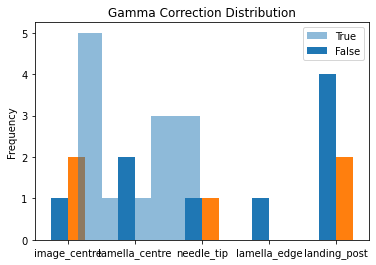

In [7]:
# eval

fig = plot_ml_data(score_dict)


<AxesSubplot:title={'center':'Gamma Correction Distribution'}, ylabel='Frequency'>

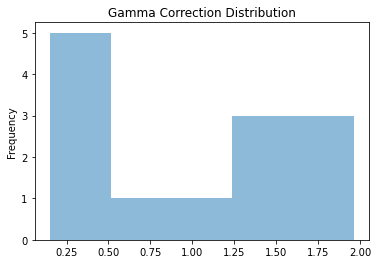

In [9]:
plot_gamma_data(gamma_dict)

## Gamma Correction Evaluation
evaluate the average gamma correction


In [6]:

# pprint(gamma_dict)
# df_gamma = pd.DataFrame(gamma_dict)
# print(df_gamma)

# df_gamma["gamma"].plot.hist(bins=5, alpha=0.5, title="Gamma Correction Distribution")

NameError: name 'df_gamma' is not defined